In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload CSV file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Load CSV
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

Saving Finance_data.csv to Finance_data (1).csv
User uploaded file "Finance_data (1).csv" with length 8555 bytes


In [9]:
def show_top5_table(title, data):
    print(f"\n==== {title} ====")
    display(data.head(5))

def bar_chart(title, data, xlabel, ylabel):
    plt.figure(figsize=(8,4))
    data.head(5).plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

show_top5_table("First 5 Rows of the Dataset", df)


==== First 5 Rows of the Dataset ====


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


Top 5 overall preferred investment avenues


==== Top-5 Preferred Investment Avenues ====


,0
Gold,5.975
Debentures,5.750
Government_Bonds,4.650
Fixed_Deposits,3.575
Equity_Market,3.475


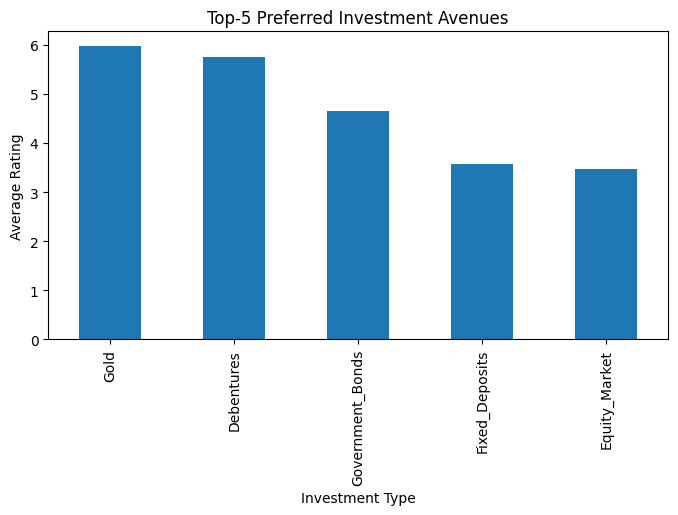

In [10]:
inv_cols = ['Mutual_Funds','Equity_Market','Debentures','Government_Bonds',
            'Fixed_Deposits','PPF','Gold','Stock_Marktet']

# Convert investment columns to numeric, coercing errors to NaN
for col in inv_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

top_pref = df[inv_cols].mean().sort_values(ascending=False)
show_top5_table("Top-5 Preferred Investment Avenues", top_pref)
bar_chart("Top-5 Preferred Investment Avenues", top_pref, "Investment Type", "Average Rating")

Top 5 investment preferences by Gender


==== Top-5 by Gender (Higher rating preferred) ====


gender,Female,Male
Debentures,5.200000,6.08
Gold,5.866667,6.04
Government_Bonds,4.333333,4.84
Equity_Market,3.333333,3.56
Fixed_Deposits,4.200000,3.20


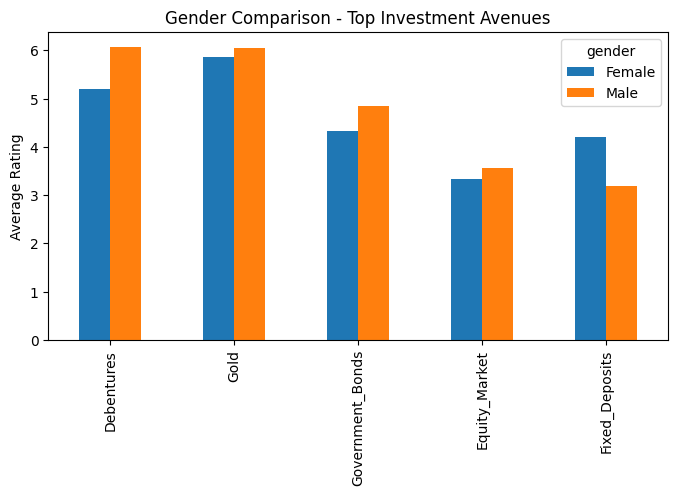

In [11]:
gender_pref = df.groupby("gender")[inv_cols].mean().T.sort_values(by='Male', ascending=False)
show_top5_table("Top-5 by Gender (Higher rating preferred)", gender_pref)
gender_pref.head(5).plot(kind='bar', figsize=(8,4))
plt.title("Gender Comparison - Top Investment Avenues")
plt.ylabel("Average Rating")
plt.show()

Top 5 reasons for investing
# (Combining all reason columns)


==== Top-5 Reasons for Investing ====


,0
Capital Appreciation,30.0
Assured Returns,26.0
Better Returns,24.0
Risk Free,19.0
Fixed Returns,18.0


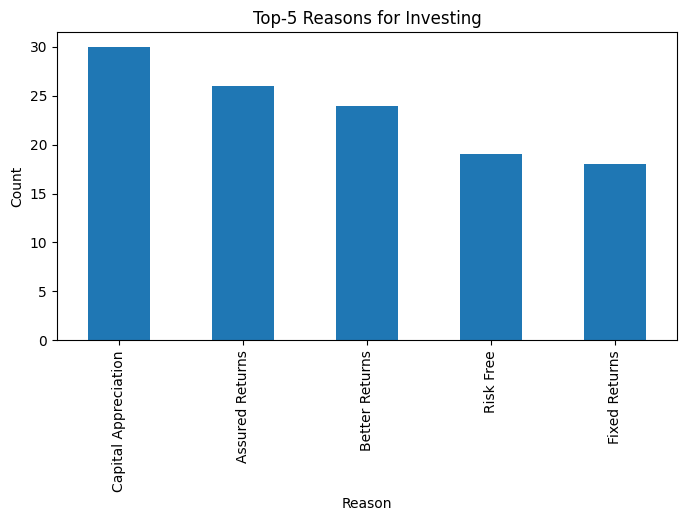

In [12]:
reason_cols = ['Reason_Equity','Reason_Mutual','Reason_Bonds','Reason_FD']
reasons = df[reason_cols].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
top_reasons = reasons.sort_values(ascending=False)
show_top5_table("Top-5 Reasons for Investing", top_reasons)
bar_chart("Top-5 Reasons for Investing", top_reasons, "Reason", "Count")

Top 5 age group preferences for Mutual Funds


==== Top-5 Age Groups preferring Mutual Funds ====


/tmp/ipython-input-4206506671.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_age_mutual = df.groupby(age_group)['Mutual_Funds'].mean().sort_values(ascending=False)


,Mutual_Funds
age,
20-30,2.645161
30-40,2.222222
<20,NaN
40-50,NaN
50+,NaN


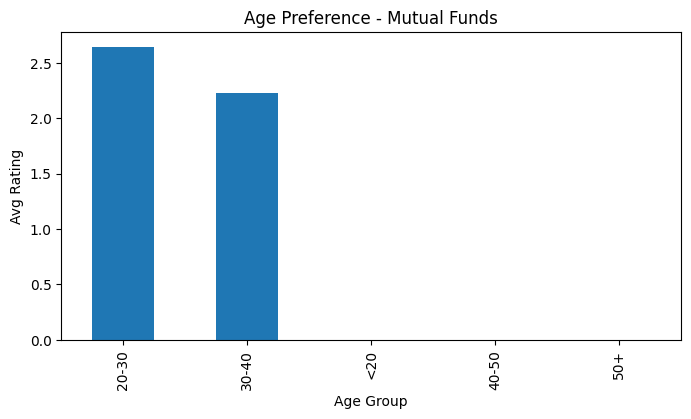

In [13]:
age_group = pd.cut(df['age'], bins=[0,20,30,40,50,100],
                   labels=['<20','20-30','30-40','40-50','50+'])
top_age_mutual = df.groupby(age_group)['Mutual_Funds'].mean().sort_values(ascending=False)
show_top5_table("Top-5 Age Groups preferring Mutual Funds", top_age_mutual)
bar_chart("Age Preference - Mutual Funds", top_age_mutual, "Age Group", "Avg Rating")


Top 5 conservative vs risky investments
# Risky = Equity Market + Stock Market
# Safe = FD + Govt Bonds + Debentures


==== Risk Category Preference ====


,0
Safe,13.975
Risky,NaN


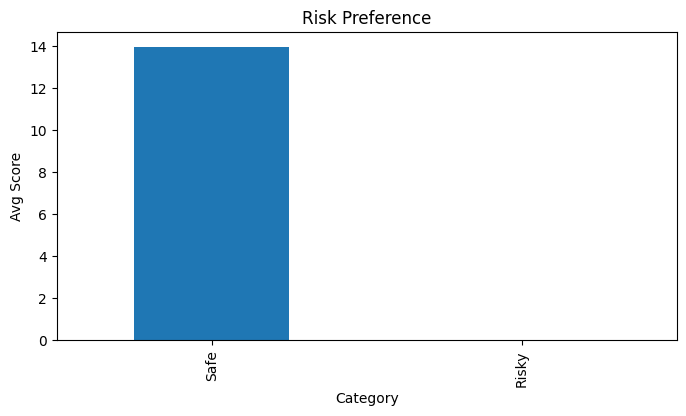

In [14]:
df['Risk_Score'] = df['Equity_Market'] + df['Stock_Marktet']
df['Safe_Score'] = df['Fixed_Deposits'] + df['Government_Bonds'] + df['Debentures']

risk_data = {
    "Risky": df['Risk_Score'].mean(),
    "Safe": df['Safe_Score'].mean()
}

risk_series = pd.Series(risk_data).sort_values(ascending=False)
show_top5_table("Risk Category Preference", risk_series)
bar_chart("Risk Preference", risk_series, "Category", "Avg Score")

Top 5 financial information sources


==== Top-5 Sources of Financial Information ====


,count
Source,
Financial Consultants,16
Newspapers and Magazines,14
Television,6
Internet,4


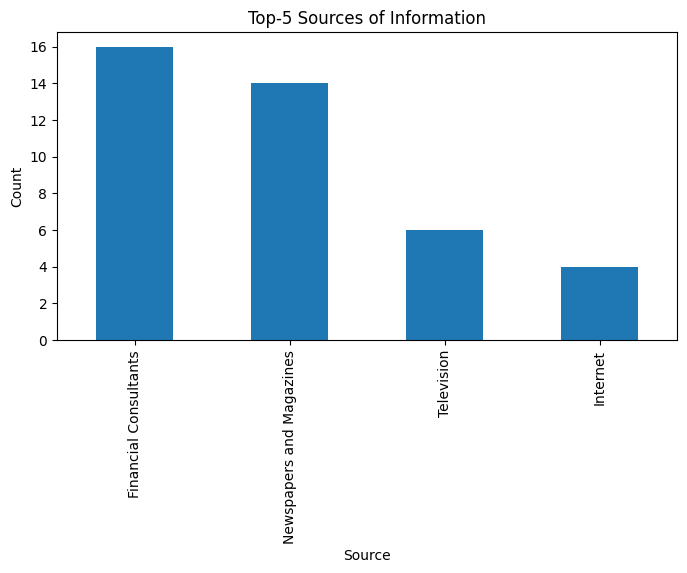

In [15]:
sources = df['Source'].value_counts().sort_values(ascending=False)
show_top5_table("Top-5 Sources of Financial Information", sources)
bar_chart("Top-5 Sources of Information", sources, "Source", "Count")